# Discrete Cosine Transform - Part 1

In [30]:
using Gadfly
Gadfly.push_theme(Theme(background_color="white"))

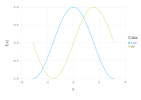

In [31]:
#Plot cos and sin 
p = plot()
p = plot([cos,sin],-pi,pi,Guide.colorkey(labels=["cos","sin"]))


Recall the definition of even and odd functions: $$f(-x) = f(x) \ :even\ function\\  f(-x) = -f(x)\ :odd\ function.$$ As $cos(-x)=cos(x), sin(-x)=-sin(x)$, the cosine function is even and the sine function is odd.  

With the Discrete Fourier transform (DFT), we multiply a real signal $x[n]$ by the basis complex exponential $e^{j2\pi kn/N}$. This results in general complex valued transforms. The DCT is a transform where the basis sequences are cosines (using only the real part of $e^{j2\pi kn/N}$). This results in real valued transforms. The DCT inherits the even symmetry and periodic properties of $cos$ functions.

We start with a 4 point signal $x_o[n]$ as shown below. 

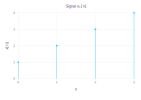

In [32]:
plot(x=0:3,y=[1,2,3,4],Geom.hair,Geom.point,
        Guide.title("Signal xₒ[n]"),Guide.XLabel("n"),Guide.YLabel("x[n]"))


We next extend $x_o[n]$ such that it exhibits the even property ("cos like") and extend copies of the new even signal with period T to achieve periodicity. There are many ways of doing this, one example of this is to mirror $x_o[n]$ over $n=0$ and then shifting copies of it for perodicity.
The 4 common even periodically extension of the signal $x_o[n]$ are shown below. 

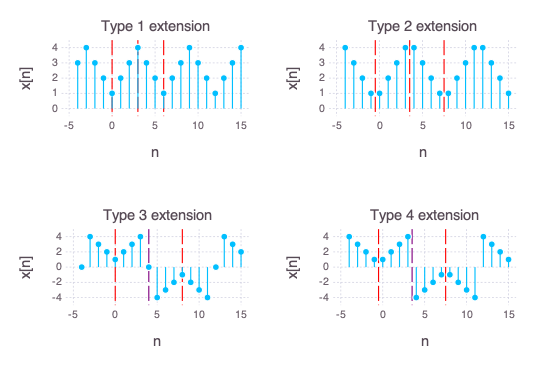

In [33]:
x=-4:15
t_1 = plot(x=x,
        y=[3,4,3,2,1,2,3,4,3,2,1,2,3,4,3,2,1,2,3,4],Geom.hair,Geom.point,
        xintercept=[0,3,6],Geom.vline(color="red",style=[:dash]),
        Guide.title("Type 1 extension"),Guide.XLabel("n"),Guide.YLabel("x[n]"))
t_2 = plot(x=x,
        y=[4,3,2,1,1,2,3,4,4,3,2,1,1,2,3,4,4,3,2,1],Geom.hair,Geom.point,
        xintercept=[-0.5,3.5,7.5],Geom.vline(color="red",style=[:dash]),
        Guide.title("Type 2 extension"),Guide.XLabel("n"),Guide.YLabel("x[n]"))
t_3 = plot(x=x,
        y=[0,4,3,2,1,2,3,4,0,-4,-3,-2,-1,-2,-3,-4,0,4,3,2],Geom.hair,Geom.point,
        xintercept=[0,4,8,],Geom.vline(color=["red","purple","red"],style=[:dash]),
        Guide.title("Type 3 extension"),Guide.XLabel("n"),Guide.YLabel("x[n]"))
t_4 = plot(x=x,
        y=[4,3,2,1,1,2,3,4,-4,-3,-2,-1,-1,-2,-3,-4,4,3,2,1],Geom.hair,Geom.point,
        xintercept=[-0.5,3.5,7.5],Geom.vline(color=["red","purple","red"],style=[:dash]),
        Guide.title("Type 4 extension"),Guide.XLabel("n"),Guide.YLabel("x[n]"))

gridstack([t_1 t_2; t_3 t_4])


## Type 1 periodic extension

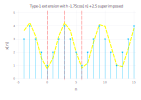

In [34]:
x=-4:15
ls=[]
append!(ls,layer(x=x,y=[3,4,3,2,1,2,3,4,3,2,1,2,3,4,3,2,1,2,3,4],
        Geom.hair,Geom.point))
append!(ls,layer(x=x,y=-1.75cos.(x).+2.5,Geom.line,
        Theme(default_color=color("yellow"),line_width=1mm, line_style=[:dash])))
       
plot(ls...,xintercept=[0,3,6],Geom.vline(color="red",style=[:dash]),
    Guide.title("Type-1 extension with -1.75cos[n]+2.5 superimposed"),
    Guide.XLabel("n"),Guide.YLabel("x[n]"))


The Type 1 periodic extension is obtained by mirroring $x_o[n]$ about $n=0$ and then sliding the signal to n=3, 9, ... The mirrored $x_o[n]$ + $x_o[n]$ signal has period 6 (2N-2). When we add the mirrored $x_o[n]$ + $x_o[n]$ together and then periodically extend them, the edge points (N=0, N-1) overlap. Hence, there is a scale of half at the edge points (N=0, N-1). Note that the resulting Type 1 periodic extension has a similar oscillatory cosine property. To see this, we plot an approximate $-1.75cos(n)+2.5$ envelop (yellow) over our signal. We can see from the yellow dashed line that 
1. It is even around 0, N-1, 2N-2... (In cos equivalent terms, 0, $\pi$, $2\pi$...). The red vertical dashed lines show even symmetry. 
2. There is a DC bias. This suggests that with our Type 1 periodic extension, in addition to the cosine component, we have a constant bias in the signal. 

### Definition of DCT-1 
$$X_{DCT-1}[k] = \sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})$$
$$for\ k=0...N-1$$
where $$\alpha[n]=\begin{dcases}\frac{1}{2}\ for\ n=0,N-1\\ 1\ for\ n=1...N-2 \end{dcases}$$


Even/Odd Property: 
- At n=0 & N-1, x[n] is even
- At k=0 & N-1, X[k] is even

### DFT of Type 1 periodic extension 
For notation simplicity here, let $x[n]=x_o[n]$, mirrored $x_o[n] = x[-n]$ 
$$
Using\ the\ DFT\ definition\ DFT\{x[n]\}=\sum_{n=0}^{N-1}x[n]e^{-j\omega k}\\
2N-2\ point\ DFT\{\alpha[n]x[n]+\alpha[n]x[-n]\}\\
= \sum_{n=0}^{2N-3}\alpha[n]x[n]e^{-j2\pi nk/(2N-2)} + \sum_{n=0}^{2N-3}\alpha[n]x[-n]e^{j2\pi nk/(2N-2) }\\
= \sum_{n=0}^{2N-3}\alpha[n]x[n]e^{-j2\pi nk/(2N-2)} + \sum_{n=0}^{2N-3}\alpha[n]x[n]e^{j2\pi nk/(2N-2) }\\ (using\ x[n]=x[-n]\ property)\\
= \sum_{n=0}^{N-1}\alpha[n]x[n]e^{-j2\pi nk/(2N-2)} + \sum_{n=0}^{N-1}\alpha[n]x[n]e^{j2\pi nk/(2N-2) }\\ (using\ the\ fact\ that\ N-1\ points\ are\ zeros\ (padding))\\
= 2\underbrace{\sum_{n=0}^{N-1}\alpha[n]x[n]cos(\frac{\pi nk}{(N-1})}_{\text{$X_{DCT-1}[k]$}}  \tag{1}

$$

## Type 2 periodic extension

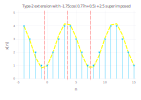

In [35]:
x=-4:15
ls=[]
append!(ls,layer(x=x,y=[4,3,2,1,1,2,3,4,4,3,2,1,1,2,3,4,4,3,2,1],
        Geom.hair,Geom.point))
append!(ls,layer(x=x,y=-1.75cos.(0.77*x.+0.5).+2.5,Geom.line,
        Theme(default_color=color("yellow"),line_width=1mm, line_style=[:dash])))
       
plot(ls...,xintercept=[-0.5,3.5,7.5],Geom.vline(color="red",style=[:dash]),
    Guide.title("Type-2 extension with -1.75cos(0.77n+0.5)+2.5 superimposed"),
    Guide.XLabel("n"),Guide.YLabel("x[n]"))


The Type 2 periodic extension is obtained by mirroring $x_o[n]$ about $n=-0.5$ and then sliding the signal to n=3.5, 11.5, ... The $x_o[-n-1]$ + $x_o[n]$ signal has period 8 (2N). Unlike the Type 1, when we add $x_o[-n-1]$ + $x_o[n]$ together and then periodically extend them, there is no overlap. Note that the resulting Type 2 periodic extension has a similar oscillatory cosine property. To see this, we plot an approximate $-1.75cos(0.77n+0.5)+2.5$ envelop (yellow) over our signal. We can see from the yellow dashed line that 
1. It is even around -0.5, N-0.5, 2N-0.5... (In cos equivalent terms, 0, $\pi$, $2\pi$...). The red vertical dashed lines show even symmetry. 
2. There is a DC bias. 


### Definition of DCT-2 
$$X_{DCT-2}[k] =\sum_{n=0}^{N-1} x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N}) $$
$$for\ k=0...N-1$$
Even/Odd Property: 
- At n=-0.5 & N-0.5, x[n] is even
- At k=0, X[k] is even
- At k=N, X[k] is odd

This is the most commonly used DCT definition and is also known as the DCT.

### DFT of Type 2 periodic extension 
For notation simplicity here, let $x[n]=x_o[n]$, mirrored $x_o[n] = x[-n-1]$ 
$$
Using\ the\ DFT\ definition\ DFT\{x[n]\}=\sum_{n=0}^{N-1}x[n]e^{-j\omega k}\\
2N\ point\ DFT\{x[n]+x[-n-1]\}\\
= \sum_{n=0}^{2N-1}x[n]e^{-j2\pi nk/(2N)} + \sum_{n=0}^{2N-1}x[-n-1]e^{j2\pi (n+1)k/(2N) }\\
= \sum_{n=0}^{2N-1}x[n]e^{-j2\pi nk/(2N)} + e^{j2\pi k/(2N) }\sum_{n=0}^{2N-1}x[n]e^{j2\pi nk/(2N) }\\ (using\ using\ x[n]=x[-n-1]\ property)\\
= e^{j\pi k/2N}[e^{-j\pi k/2N}\sum_{n=0}^{N-1}x[n]e^{-j2\pi nk/(2N)} + e^{j\pi k/2N}\sum_{n=0}^{N-1}x[n]e^{j2\pi nk/(2N) }]\\ (using\ the\ fact\ that\ N\ points\ are\ zeros\ (padding))\\
= e^{j\pi k/2N}[\sum_{n=0}^{N-1}x[n]e^{-j\pi (2n+1)k/(2N)} + \sum_{n=0}^{N-1}x[n]e^{j\pi (2n+1)k/(2N) }]\\
= 2e^{j\pi k/2N}\underbrace{\sum_{n=0}^{N-1}x[n]cos(\frac{\pi (2n+1)k}{2N})}_{\text{$X_{DCT-2}[k]$}} \tag{2}

$$

## Type 3 Periodic extension

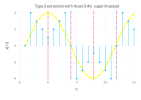

In [36]:
x=-4:15
ls=[]
append!(ls,layer(x=x,y=[0,4,3,2,1,2,3,4,0,-4,-3,-2,-1,-2,-3,-4,0,4,3,2],
        Geom.hair,Geom.point))
append!(ls,layer(x=x,y=4cos.(0.4x),Geom.line,
        Theme(default_color=color("yellow"),line_width=1mm, line_style=[:dash])))
       
plot(ls...,xintercept=[0,4,8,12],Geom.vline(color=["red","purple","red","purple"],style=[:dash]),
    Guide.title("Type-3 extension with 4cos(0.4n) superimposed"),
    Guide.XLabel("n"),Guide.YLabel("x[n]"))


The Type 3 periodic extension is obtained by mirroring $x_o[n]$ about $n=0$ and then sliding the signal to n=5, 13, ... The overall signal has period 16 (4N). Like the Type 1, when we add $x_o[-n]$ + $x_o[n]$ together and then periodically extend them, there is overlap at n=0. However at n=4 & n=12, there is a zero crossing and signal is flipped along n-axis. Note that the resulting Type 3 periodic extension has an oscillatory cosine property. To see this, we plot an approximate $4cos(0.4n)$ envelop (yellow) over our signal. 
1. We can see from the red dashed line that it is even around 0, 8... (half cycle) (In cos equivalent terms, 0, $\pi$, $2\pi$...). 
2. The vertical purple dashed lines show odd symmetry. (In cos equivalent terms, $\pi/2$, $3/2\pi$...)
3. There is no DC bias. 


### Definition of DCT-3 
$$X_{DCT-3}[k] =\sum_{n=0}^{N-1} \alpha[n] x[n]cos(\frac{\pi (k+\frac{1}{2})n }{N})$$
$$for\ k=0...N-1$$
where $$\alpha[n]=\begin{dcases}\frac{1}{2}\ for\ n=0\\ 1\ for\ n=1,...N-1\end{dcases}$$


## Type 4 Periodic extension

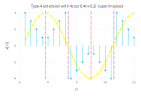

In [37]:
x=-4:15
ls=[]
append!(ls,layer(x=x,y=[4,3,2,1,1,2,3,4,-4,-3,-2,-1,-1,-2,-3,-4,4,3,2,1],
        Geom.hair,Geom.point))
append!(ls,layer(x=x,y=4cos.(0.4x.+0.5*.4),Geom.line,
        Theme(default_color=color("yellow"),line_width=1mm, line_style=[:dash])))
       
plot(ls...,xintercept=[-0.5,3.5,7.5,11.5],Geom.vline(color=["red","purple","red","purple"],style=[:dash]),
    Guide.title("Type-4 extension with 4cos(0.4n+0.2) superimposed"),
    Guide.XLabel("n"),Guide.YLabel("x[n]"))


The Type 4 periodic extension is obtained by mirroring $x_o[n]$ about $n=-0.5$ and then sliding the signal to n=4, 12, ... The overall signal has period 16 (4N). There is no overlaps unlike the DCT-3. Note that the resulting Type 4 periodic extension has an oscillatory cosine property. To see this, we plot an approximate $4cos(0.4n+0.2)$ envelop (yellow) over our signal. 
1. We can see from the red dashed line that it is even around -0.5, 7.5... (half cycle) (In cos equivalent terms, 0, $\pi$, $2\pi$...). 
2. The vertical purple dashed lines show odd symmetry. (In cos equivalent terms, $\pi/2$, $3/2\pi$...)
3. There is no DC bias. 


### Definition of DCT-4 
$$X_{DCT-4}[k]  =\sum_{n=0}^{N-1} x[n]cos(\frac{\pi (k+\frac{1}{2}) (n+\frac{1}{2}) }{N})$$
$$for\ k=0...N-1$$



# Inverse Discrete Cosine Transform
### Inverse DCT 1
To reconstruct $x[n]$ from $X_{DCT-1}[k]$ we can
use the 2N-2 Inverse DFT formula and apply on $(1)$
$$\frac{1}{2N-2}\sum_{k=0}^{2N-3}2X_{DCT-1}[k]e^{j2\pi kn/2N-2}\\
=\frac{2}{2N-2}\sum_{k=0}^{2N-3}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})e^{j2\pi kn/2N-2}\\
=\frac{2}{2N-2}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})e^{j2\pi kn/2N-2}\\
+\frac{2}{2N-2}\sum_{k=N}^{2N-3}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi n(2N-2-k) }{N-1})e^{j2\pi n(2N-2-k)/2N-2}\\
=\frac{2}{2N-2}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})e^{j2\pi kn/2N-2}\\
+\frac{2}{2N-2}\sum_{k=N}^{N-1}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi n(-k) }{N-1})e^{j2\pi n(-k)/2N-2}\\
=\frac{2}{2N-2}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})[e^{j2\pi kn/2N-2}+e^{-j2\pi kn/2N-2}]\\
=\frac{2}{2N-2}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})[2cos(\frac{\pi nk }{N-1})]\\
=\frac{2}{N-1}\sum_{k=0}^{N-1}\underbrace{\sum_{n=0}^{N-1}\alpha[n] x[n]cos(\frac{\pi nk }{N-1})}_{\text{$X_{DCT-1}[k]$}}cos(\frac{\pi nk }{N-1})\\
$$

$$
IDCT-1 = \frac{2}{N-1}\sum_{k=0}^{N-1}X_{DCT-1}[k]cos(\frac{\pi nk }{N-1})\\
$$
$$for\ k=0...N-1$$

### Inverse DCT 2
To reconstruct $x[n]$ from $X_{DCT-2}[k]$ we can
use the 2N Inverse DFT formula and apply on $(2)$
$$\frac{1}{2N}\sum_{k=0}^{2N}X[k]e^{j2\pi kn/2N}\\
=\frac{1}{2N}\sum_{k=0}^{2N}\sum_{n=0}^{N-1}2e^{j\pi k}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})e^{j2\pi kn/2N}\\
=\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})e^{j\pi k(2n+1)/2N}\\
+\frac{1}{N}\sum_{k=N}^{2N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi (2N-k) (n+\frac{1}{2}) }{N})e^{j\pi (2N-k)(2n+1)/2N}\\
=\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})e^{j\pi k(2n+1)/2N}\\
+\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi (-k) (n+\frac{1}{2}) }{N})e^{j\pi (-k)(2n+1)/2N}\\
=\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})[e^{j\pi k(2n+1)/2N}+e^{-j\pi k(2n+1)/2N}]\\
=\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})[e^{j\pi k(2n+1)/2N}+e^{-j\pi k(2n+1)/2N}]\\
=\frac{2}{N}\sum_{k=0}^{N-1}\underbrace{\sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (n+\frac{1}{2}) }{N})}_{\text{$X_{DCT-2}[k]$}}cos(\frac{\pi k(2n+1)}{2N})\\
$$

$$
IDCT-2 = \frac{2}{N}\sum_{k=0}^{N-1}X_{DCT-1}[k]cos(\frac{\pi k (n+\frac{1}{2})}{N})\\
$$

$$for\ k=0...N-1$$



# References
1. Discrete-Time Signal Processing Third Edition Alan V. Oppenheim Ronald W. Schafer 